In [2]:
import os
import pickle
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set_style('white')
sns.set_theme(style='whitegrid')


# %matplotlib inline
#MY SETUP FOR MATPLOTLIB
# def setup_mpl():
#     mpl.rc('font', size=7)
#     mpl.rcParams['legend.fontsize'] = 'small'
#     mpl.rcParams['legend.fontsize'] = 'small'
#     mpl.rcParams['xtick.labelsize'] = 'small'
#     mpl.rcParams['ytick.labelsize'] = 'small'
#     mpl.rcParams['font.family']='Helvetica 55 Roman'
#     mpl.rcParams['lines.linewidth'] = 1
#     mpl.rcParams['xtick.major.width'] = 2/3.
#     mpl.rcParams['ytick.major.width'] = 2/3.
#     mpl.rcParams['xtick.minor.width'] = 2/3.
#     mpl.rcParams['ytick.minor.width'] = 2/3.
#     mpl.rcParams['xtick.major.size'] = 3
#     mpl.rcParams['ytick.major.size'] = 3
#     mpl.rcParams['xtick.minor.size'] = 1.5
#     mpl.rcParams['ytick.minor.size'] = 1.5
#     mpl.rcParams['axes.linewidth'] = 2/3.
#     mpl.rcParams['ytick.direction'] = 'in'
#     mpl.rcParams['xtick.direction'] = 'in'
#     mpl.rcParams['xtick.top']=True
#     mpl.rcParams['ytick.right']=True
#     mpl.rcParams['mathtext.default']='regular'
#     mpl.rcParams['xtick.major.pad']='2.3'
#     mpl.rcParams['ytick.major.pad']='2.3'
#     mpl.rcParams['axes.labelpad']= 2
#     mpl.rcParams['figure.dpi'] = 400
#     mpl.rcParams['svg.fonttype'] = "none"
#     alpha = 0.6
#     to_rgba = mpl.colors.ColorConverter().to_rgba
# setup_mpl()

In [17]:
with open('experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)
print(predictions.keys())
# record = 'C1519_3 170949.h5'
record = 'SSC_4990_1.h5'
r = predictions[record]
print(r)

dict_keys(['A0014_7 031810.h5', 'A0019_4 171223.h5', 'A0032_7 172144.h5', 'A0036_7 090210.h5', 'A0046_3 170031.h5', 'A0054_4 165117.h5', 'A0092_4 173047.h5', 'A0126_4 164443.h5', 'A0137_4 171336.h5', 'A0147_6 165655.h5', 'A0158_4 174838.h5', 'A0162_4 165732.h5', 'A0171_6 175523.h5', 'A0173_6 173103.h5', 'A0177_4 180743.h5', 'A0199_7 112211.h5', 'A0210_3 170424.h5', 'A0211_4 172202.h5', 'A0231_3 173014.h5', 'A0231_5 184015.h5', 'A0245_3 182224.h5', 'A0254_4 173212.h5', 'A0260_4 190532.h5', 'A0276_6 175711.h5', 'A0503_7 081712.h5', 'A0516_4 172514.h5', 'A0516_6 173648.h5', 'A0516_7 090110.h5', 'A0531_6 175138.h5', 'A0548_3 164736.h5', 'A0564_3 181818.h5', 'A0577_4 173253.h5', 'A0582_4 162554.h5', 'A0616_6 175217.h5', 'A0622_3 170137.h5', 'A0624_3 175523.h5', 'A0650_4 174939.h5', 'A0652_4 152320.h5', 'A0652_7 031611.h5', 'A0654_3 174313.h5', 'A0654_5 190555.h5', 'A0672_4 170526.h5', 'A0688_4 172837.h5', 'A0719_4 172439.h5', 'A0730_7 050212.h5', 'A0732_4 172658.h5', 'A0788_4 180342.h5', 'A

In [4]:
print(r['alphas'].shape)
print(r['logits'].shape)
print(r['predicted'].shape)
print(r['true'].shape)
print(r['logits'][0, :].sum())
print(r['alphas'][:30].sum())

(33900,)
(33900, 5)
(1130, 5)
(1130, 5)
1.0
1.0


[1.         1.         0.9999999  0.99999994 0.99999994 1.0000001
 1.         1.         1.         1.        ]


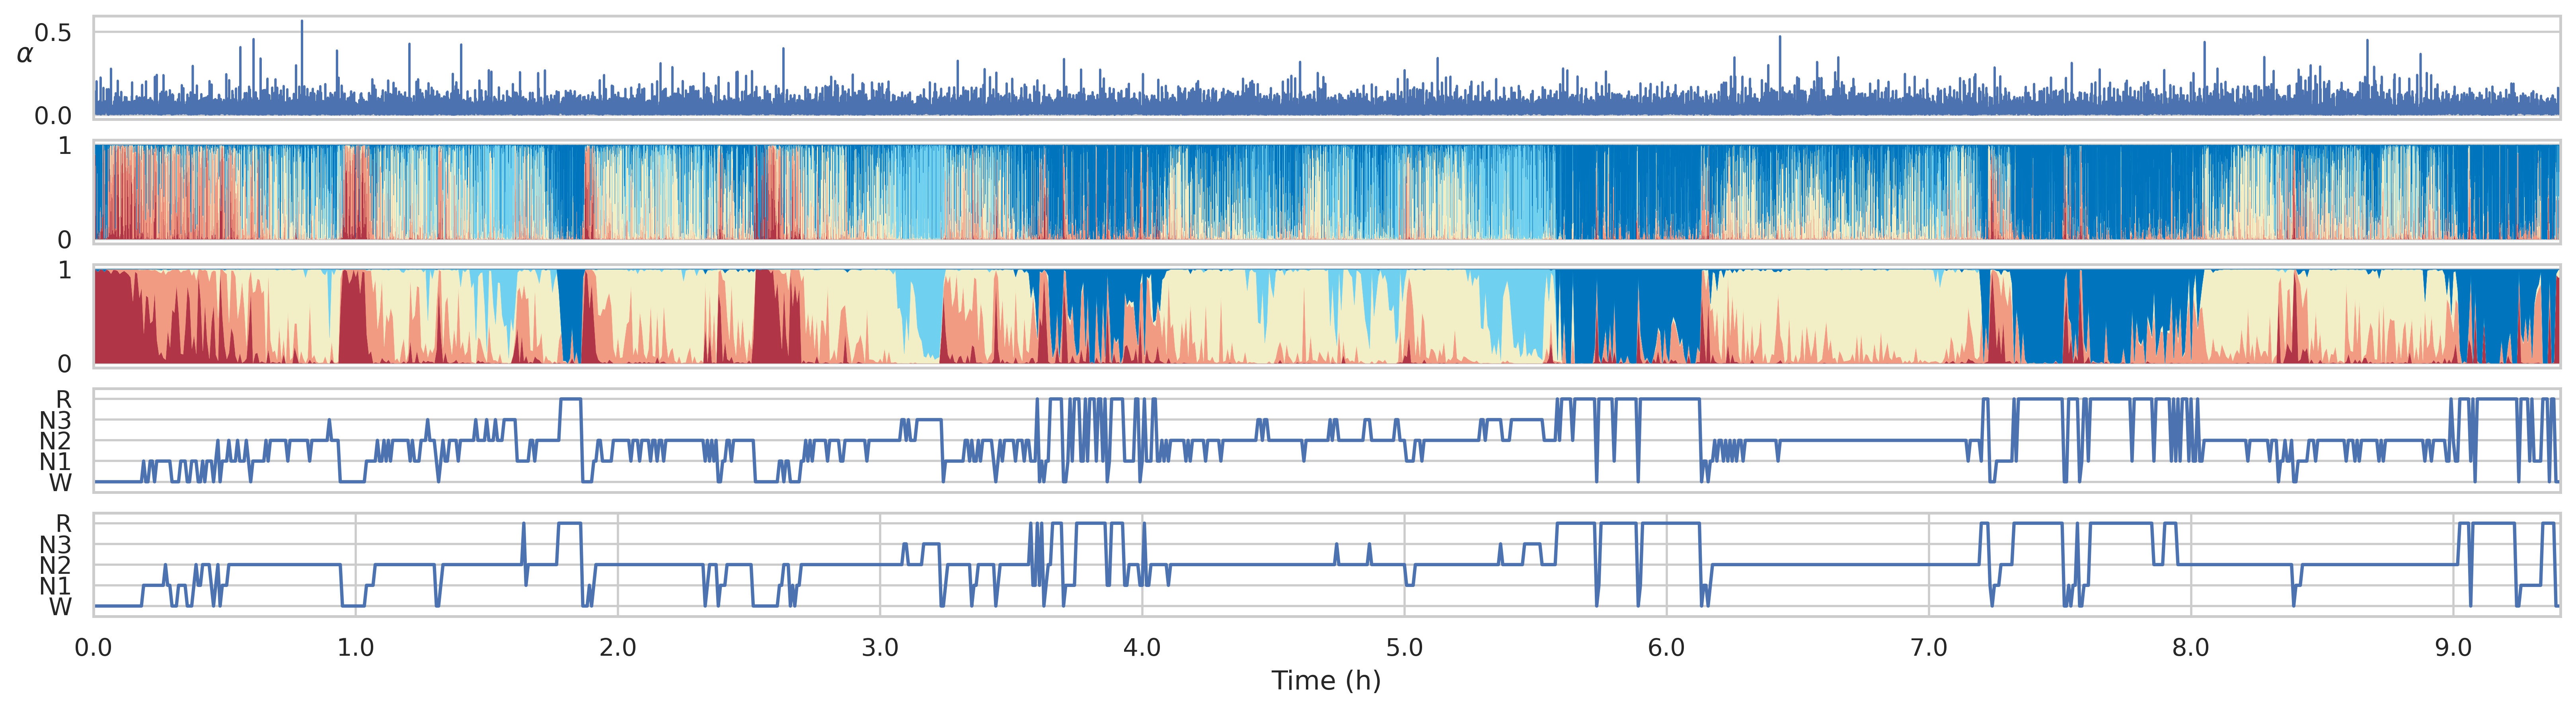

In [19]:
def plot_attention(alphas, logits, preds, trues):
    f, ax = plt.subplots(nrows=5, figsize=(20, 5), dpi=400)
    
    # Plot attention alphas
    ax[0].plot(alphas, linewidth=1.0)
    ax[0].set_xlim(0, len(alphas) - 1)
    # ax[0].set_ylim(0, 1.0)
    ax[0].get_xaxis().set_visible(False)
    ax[0].set_ylabel(r'$\alpha$', rotation=0)
    
    # Plot the hypnodensity
    cmap = np.array(
        [[0.6863, 0.2078, 0.2784], [0.9490, 0.6078, 0.5118], [0.9490, 0.9333, 0.7725], [0.4353, 0.8157, 0.9353], [0.0000, 0.4549, 0.7373]]
    )
    hypnodensity = logits.T
    y_ = np.zeros((hypnodensity.shape[0] + 1, hypnodensity.shape[1]))
    y_[1:, :] = np.cumsum(hypnodensity, axis=0)
    l = []
    for n in range(hypnodensity.shape[0]):
        l.append(ax[1].fill_between(np.arange(hypnodensity.shape[1]), y_[n, :], y_[n + 1, :], edgecolor="face", facecolor=cmap[n, :], linewidth=0.1))
    ax[1].set_xlim(0, hypnodensity.shape[1] - 1)
    ax[1].get_xaxis().set_visible(False)

    # Plot predicted hypnodensity at 30 s
    hypnodensity = preds.T
    y_ = np.zeros((hypnodensity.shape[0] + 1, hypnodensity.shape[1]))
    y_[1:, :] = np.cumsum(hypnodensity, axis=0)
    l = []
    for n in range(hypnodensity.shape[0]):
        l.append(ax[2].fill_between(np.arange(hypnodensity.shape[1]), y_[n, :], y_[n + 1, :], edgecolor="face", facecolor=cmap[n, :], linewidth=0.1))
    ax[2].set_xlim(0, hypnodensity.shape[1] - 1)
    ax[2].get_xaxis().set_visible(False)

    # Plot predicted hyponogram
    ax[3].plot(preds.argmax(axis=-1))
    ax[3].set_xlim(0, trues.shape[0] - 1)
    ax[3].set_ylim(-.5, 4.5)
    ax[3].get_xaxis().set_visible(False)
    ax[3].set_yticks([0, 1, 2, 3, 4])
    ax[3].set_yticklabels(['W', 'N1', 'N2', 'N3', 'R'])

    # Plot true hyponogram
    ax[4].plot(trues.argmax(axis=-1))
    ax[4].set_xlim(0, trues.shape[0] - 1)
    ax[4].set_ylim(-0.5, 4.5)
    ax[4].set_yticks([0, 1, 2, 3, 4])
    ax[4].set_yticklabels(['W', 'N1', 'N2', 'N3', 'R'])
    ax[4].set_xticks(np.arange(0, trues.shape[0] - 1, 120))
    ax[4].set_xticklabels(np.arange(0, trues.shape[0] - 1, 120) * 30 / 3600)
    ax[4].set_xlabel('Time (h)')
    
    
    f.savefig('results/attention_hypnodensity.png', dpi=300, bbox_inches='tight', pad_inches=0)

plot_attention(r['alphas'], r['logits'], r['predicted'], r['true'])
# plot_attention(r['alphas'][:2400], r['logits'][:2400, :], r['predicted'][:80, :], r['true'][:80, :])
# plot_attention(r['alphas'][:4800], r['logits'][:4800, :], r['predicted'][:160, :], r['true'][:160, :])
# plot_attention(r['alphas'][4800:6000], r['logits'][4800:6000, :], r['predicted'][160:200, :], r['true'][160:200, :])
print(r['alphas'][:300].reshape(-1, 30).sum(axis=-1))

In [8]:
import numpy as np
np.arange(0, 100-1, )

array([ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81, 90])

In [20]:
from utils import transition_matrix
with np.printoptions(precision=3, suppress=True):
    print(transition_matrix(r['logits'].argmax(-1)))
    print(transition_matrix(r['predicted'].argmax(-1)))

[[0.486 0.274 0.087 0.034 0.118]
 [0.14  0.43  0.26  0.037 0.133]
 [0.073 0.323 0.415 0.107 0.082]
 [0.09  0.128 0.25  0.49  0.042]
 [0.106 0.25  0.107 0.02  0.516]]
[[0.644 0.297 0.    0.    0.059]
 [0.065 0.43  0.364 0.    0.14 ]
 [0.011 0.127 0.821 0.033 0.007]
 [0.016 0.016 0.258 0.71  0.   ]
 [0.071 0.105 0.014 0.    0.81 ]]


In [12]:
with open('experiments/massc/kw21/20201119_072314/SSC-WSC_eval_predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)
print(predictions.keys())
record = 'C1519_3 170949.h5'
# record = 'SSC_4990_1.h5'
r = predictions[record]
print(r)

dict_keys(['A0001_5 180135.h5', 'A0028_5 163131.h5', 'A0049_7 181030.h5', 'A0119_3 051910.h5', 'A0148_4 164303.h5', 'A0161_7 070810.h5', 'A0216_5 174148.h5', 'A0220_6 101812.h5', 'A0238_3 173805.h5', 'A0245_4 185246.h5', 'A0254_7 011912.h5', 'A0271_4 170313.h5', 'A0271_7 111110.h5', 'A0283_6 030510.h5', 'A0508_7 012710.h5', 'A0518_4 173858.h5', 'A0518_6 111209.h5', 'A0524_7 041311.h5', 'A0527_4 174143.h5', 'A0527_6 172821.h5', 'A0531_4 170226.h5', 'A0575_3 171144.h5', 'A0575_4 175849.h5', 'A0600_5 172301.h5', 'A0603_6 174540.h5', 'A0609_4 172731.h5', 'A0611_4 175033.h5', 'A0613_7 101411.h5', 'A0628_6 172914.h5', 'A0643_4 175452.h5', 'A0656_4 182857.h5', 'A0672_6 174021.h5', 'A0673_4 180139.h5', 'A0676_6 181527.h5', 'A0677_6 101212.h5', 'A0689_7 102810.h5', 'A0717_2 172027.h5', 'A0727_4 174511.h5', 'A0729_6 042012.h5', 'A0730_4 174504.h5', 'A0734_7 010512.h5', 'A0774_7 052412.h5', 'A0798_3 173830.h5', 'A0803_6 174924.h5', 'A0818_4 162533.h5', 'A0820_4 172543.h5', 'A1001_3 160713.h5', 'A

In [13]:
print(r.keys())
print(r['true'].shape)
print(r['predicted'].shape)

dict_keys(['true', 'true_label', 'predicted', 'predicted_label', 'stable_sleep'])
(53700, 5)
(53700, 5)


In [14]:
from utils import transition_matrix
with np.printoptions(precision=3, suppress=True):
    print(transition_matrix(r['predicted'][::2, :].argmax(-1)))

[[0.925 0.063 0.001 0.    0.01 ]
 [0.041 0.866 0.066 0.    0.027]
 [0.002 0.063 0.911 0.023 0.001]
 [0.    0.    0.173 0.827 0.   ]
 [0.06  0.122 0.002 0.    0.816]]


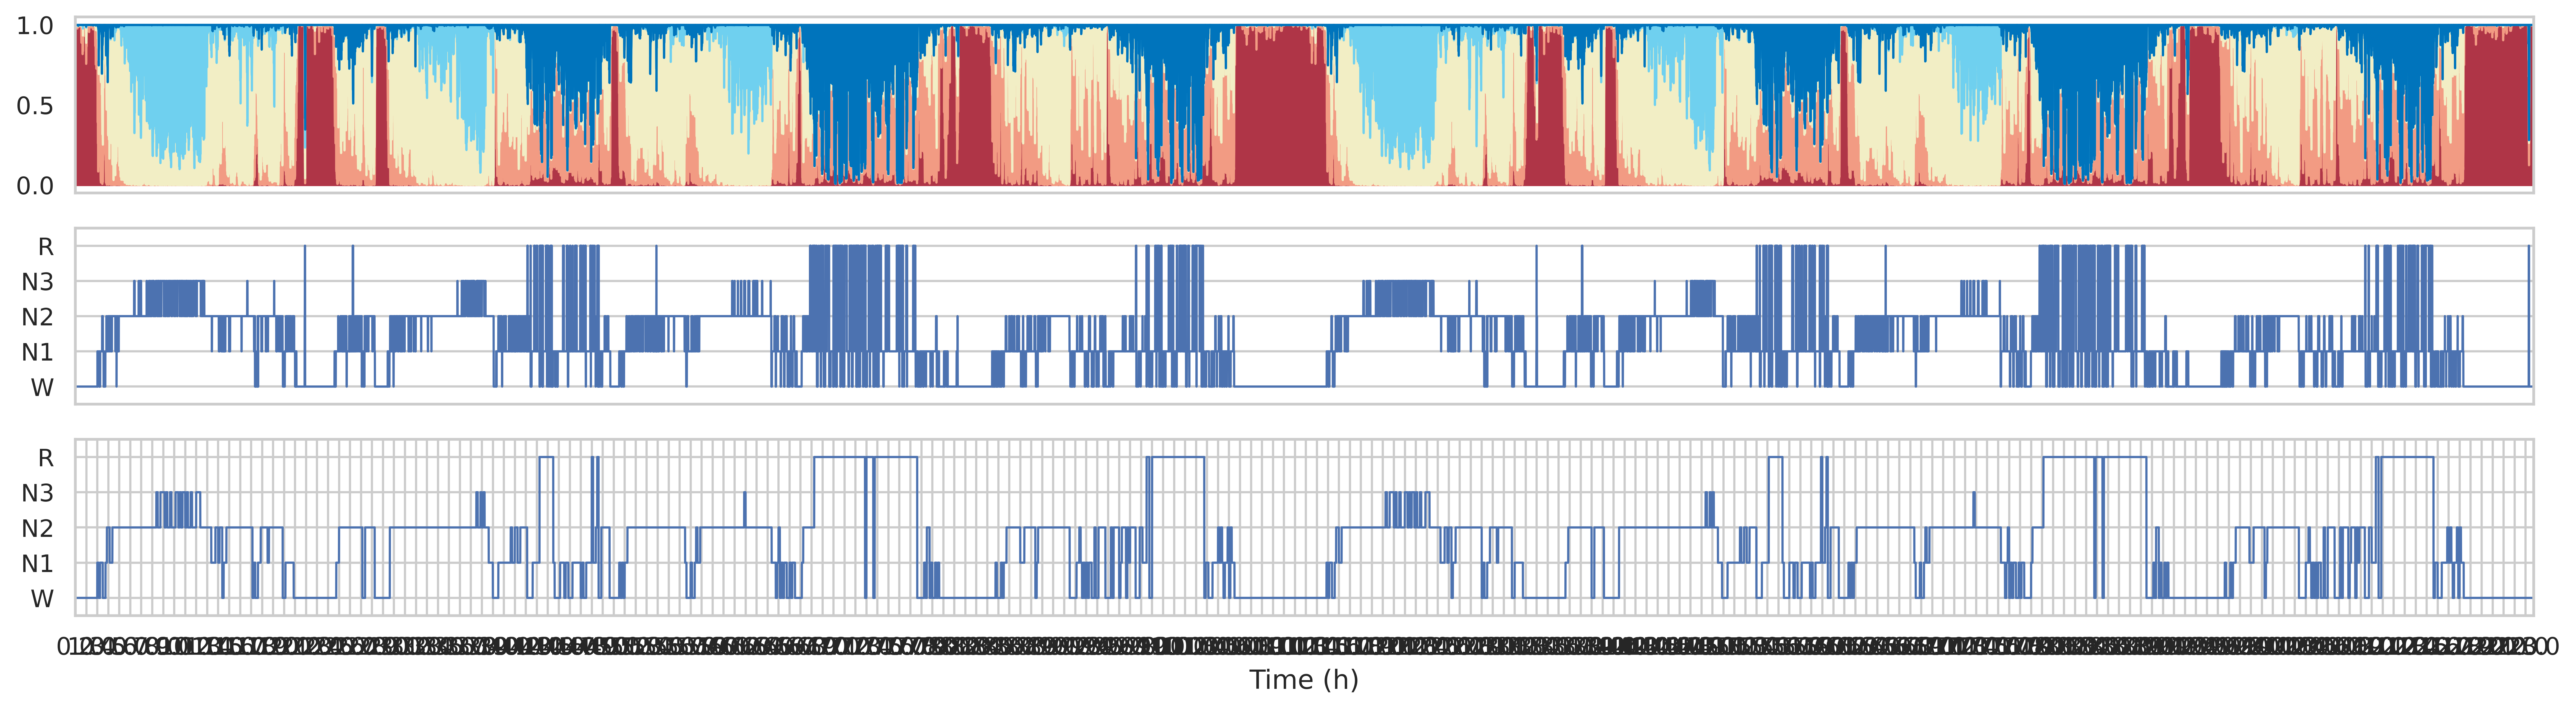

In [15]:
def plot_eval_data(preds, trues):
    f, ax = plt.subplots(nrows=3, figsize=(20, 5), dpi=600)
    
    # Plot the hypnodensity
    cmap = np.array(
        [[0.6863, 0.2078, 0.2784], [0.9490, 0.6078, 0.5118], [0.9490, 0.9333, 0.7725], [0.4353, 0.8157, 0.9353], [0.0000, 0.4549, 0.7373]]
    )
    hypnodensity = preds.T
    y_ = np.zeros((hypnodensity.shape[0] + 1, hypnodensity.shape[1]))
    y_[1:, :] = np.cumsum(hypnodensity, axis=0)
    l = []
    for n in range(hypnodensity.shape[0]):
        l.append(ax[0].fill_between(np.arange(hypnodensity.shape[1]), y_[n, :], y_[n + 1, :], edgecolor="face", facecolor=cmap[n, :], linewidth=1.0))
    ax[0].set_xlim(0, hypnodensity.shape[1] - 1)
    ax[0].get_xaxis().set_visible(False)

    # Plot predicted hyponogram
    ax[1].plot(preds.argmax(axis=-1), linewidth=1.0)
    ax[1].set_xlim(0, trues.shape[0] - 1)
    ax[1].set_ylim(-.5, 4.5)
    ax[1].get_xaxis().set_visible(False)
    ax[1].set_yticks([0, 1, 2, 3, 4])
    ax[1].set_yticklabels(['W', 'N1', 'N2', 'N3', 'R'])

    # Plot true hyponogram
    ax[2].plot(trues.argmax(axis=-1), linewidth=1.0)
    ax[2].set_xlim(0, trues.shape[0] - 1)
    ax[2].set_ylim(-0.5, 4.5)
    ax[2].set_yticks([0, 1, 2, 3, 4])
    ax[2].set_yticklabels(['W', 'N1', 'N2', 'N3', 'R'])
    ax[2].set_xticks(np.arange(0, trues.shape[0] - 1, 120))
    ax[2].set_xticklabels(np.arange(0, trues.shape[0] - 1, 120) * 30 / 3600)
    ax[2].set_xlabel('Time (h)')
    
    
    f.savefig('results/attention_hypnodensity.png', dpi=300, bbox_inches='tight', pad_inches=0)

plot_eval_data(r['predicted'][::2, :], r['true'][::2, :])
# plot_attention(r['alphas'][:2400], r['logits'][:2400, :], r['predicted'][:80, :], r['true'][:80, :])
# plot_attention(r['alphas'][:4800], r['logits'][:4800, :], r['predicted'][:160, :], r['true'][:160, :])
# plot_attention(r['alphas'][4800:6000], r['logits'][4800:6000, :], r['predicted'][160:200, :], r['true'][160:200, :])